# Project

In [213]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from itertools import izip

In [259]:
df = pd.read_csv('KS_Mobile_Calls.csv',header = None)

In [260]:
DT,cat,nr =[],[],[]

for i in range(1,len(df.index)):
    s = df[0][i].split(';')
    d,t,ty,n = s[0].split(' ')[0],s[1],s[-2],int(s[-1])
    DT.append(d+' '+t)
    cat.append(ty)
    nr.append(n)
    

In [261]:
dtemp = {'Time':DT,
        'Type':cat,
        'NumCalls':nr}

In [262]:
df=pd.DataFrame(dtemp,columns=['Time', 'Type','NumCalls'])

In [263]:
dfak = df.loc[df['Type'] == 'Mobile Faktura']

In [264]:
dfak['Time'] = pd.to_datetime(dfak.Time)


C:\Users\Wei\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [265]:
dfak.sort_values(by='Time')

,Time,Type,NumCalls
15,2013-01-01 09:00:00,Mobile Faktura,1
21,2013-01-01 09:15:00,Mobile Faktura,3
52,2013-01-01 09:15:00,Mobile Faktura,1
32,2013-01-01 09:30:00,Mobile Faktura,2
46,2013-01-01 09:30:00,Mobile Faktura,1
25,2013-01-01 09:45:00,Mobile Faktura,1
37,2013-01-01 09:45:00,Mobile Faktura,1
54,2013-01-01 10:00:00,Mobile Faktura,7
56,2013-01-01 10:15:00,Mobile Faktura,2
57,2013-01-01 10:30:00,Mobile Faktura,1


In [266]:
dfak2 = dfak.groupby(['Time'])['NumCalls'].sum()

In [267]:
dfak2 =pd.DataFrame(dfak2,columns = ['Time','NumCalls'])

In [268]:
del dfak2['Time']

In [269]:
df3  = dfak2['12-2013':'2-2014']

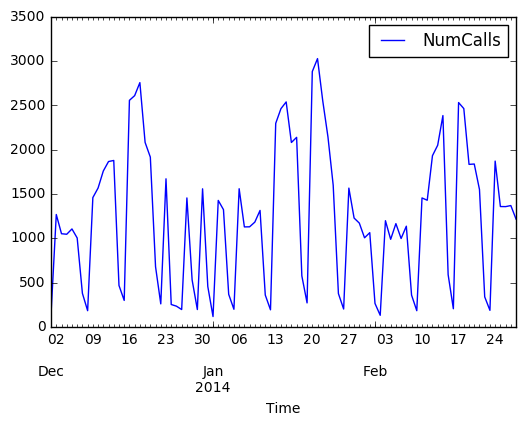

In [270]:
df3.resample('D').sum().plot()


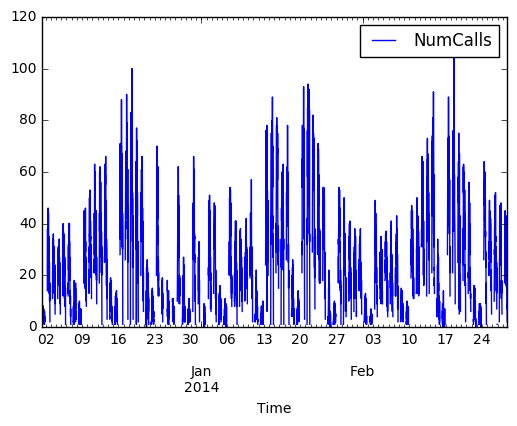

In [271]:
df3.resample('15T').sum().plot()